In [4]:
import numpy as np
import matplotlib.pyplot as plt
from integral_functions.weight_functions import get_weights
# For more Cython info on the import statement, visit the link: https://stackoverflow.com/questions/7508803/how-do-i-import-function-from-pyx-file-in-python
from scipy.stats import chi2

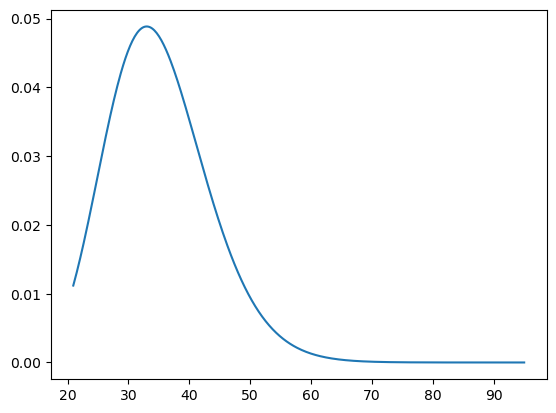

In [30]:
sample_no = 10000
cutoff_no = 110
xs = np.linspace(0, 95, num=500)
df = 35
plt.plot(xs[cutoff_no:], chi2.pdf(xs[cutoff_no:], df))

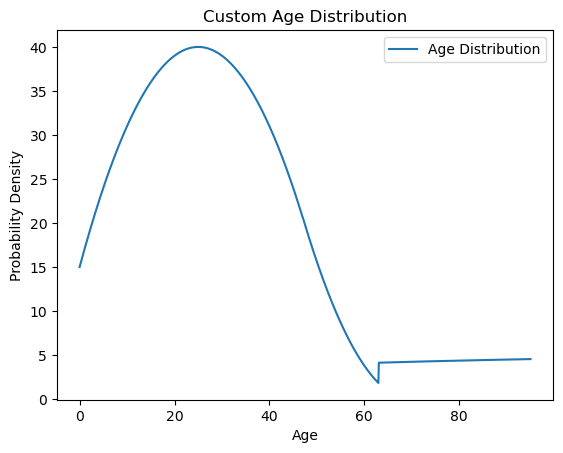

In [43]:
# We define the relevant age range
low_age = 0
high_age = 95
age_range = np.linspace(low_age, high_age, 1000)

def f(x):
    return -((1 / 5) * x - 5)**2 +40

def g(x):
    return ((x / 5) - 13.95)**2

def h(x):
    return np.log(x)

def age_distribution(age):
    if 0 <= age <= 47:
        return f(age)
    elif 47 < age <= 63.04248:
        return g(age)
    else:
        return h(age)

# Apply the distribution function to the age range
distribution = np.array([age_distribution(age) for age in age_range])

# Normalize the distribution to make it a valid probability distribution
# distribution /= np.sum(distribution)

# Plot the distribution
plt.plot(age_range, distribution, label="Age Distribution")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title("Custom Age Distribution")
plt.legend()
plt.show()

In [40]:
m = (24 - 1.90308999) / (45 - 80)
b = 24 - m * 45
b

52.41031287

In [41]:
m

-0.6313402859999999

In [35]:
distribution

array([15.0, 15.189828467105748, 15.378933488042595, 15.567315062810561,
       15.754973191409626, 15.941907873839806, 16.128119110101096,
       16.313606900193484, 16.498371244116992, 16.6824121418716,
       16.86572959345732, 17.048323598874152, 17.230194158122085,
       17.41134127120113, 17.59176493811128, 17.771465158852546,
       17.95044193342492, 18.12869526182839, 18.30622514406298,
       18.483031580128674, 18.65911457002548, 18.834474113753394,
       19.00911021131241, 19.183022862702543, 19.35621206792378,
       19.528677826976125, 19.70042013985958, 19.87143900657414,
       20.041734427119813, 20.211306401496596, 20.380154929704478,
       20.548280011743476, 20.715681647613582, 20.88235983731479,
       21.048314580847116, 21.213545878210542, 21.37805372940508,
       21.54183813443073, 21.70489909328748, 21.867236605975346,
       22.028850672494315, 22.189741292844396, 22.34990846702559,
       22.50935219503788, 22.66807247688129, 22.826069312555795,
       22

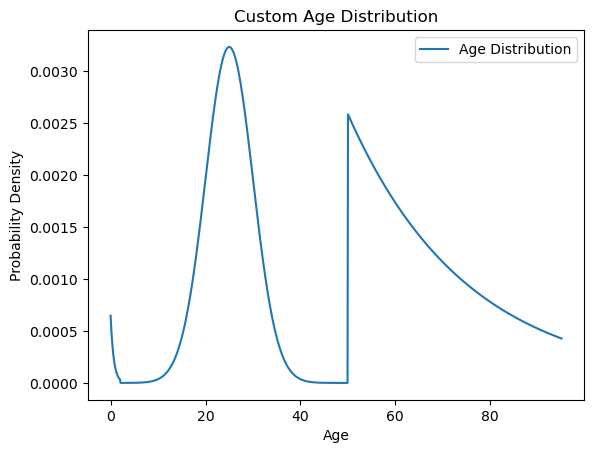

In [31]:
# Define the age range
age_range = np.linspace(0, 95, 1000)

# Define the piecewise probability distribution
def age_distribution(age):
    if age <= 2:
        return 0.2 * np.exp(-1.5 * age)  # Fewer people with very young age
    elif 2 < age <= 50:
        return np.exp(-0.02 * (age - 25)**2)  # Peak around ages 25-50
    else:
        return 0.8 * np.exp(-0.04 * (age - 50))  # Gradual decline after 50

# Apply the distribution function to the age range
distribution = np.array([age_distribution(age) for age in age_range])

# Normalize the distribution to make it a valid probability distribution
distribution /= np.sum(distribution)

# Plot the distribution
plt.plot(age_range, distribution, label="Age Distribution")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title("Custom Age Distribution")
plt.legend()
plt.show()

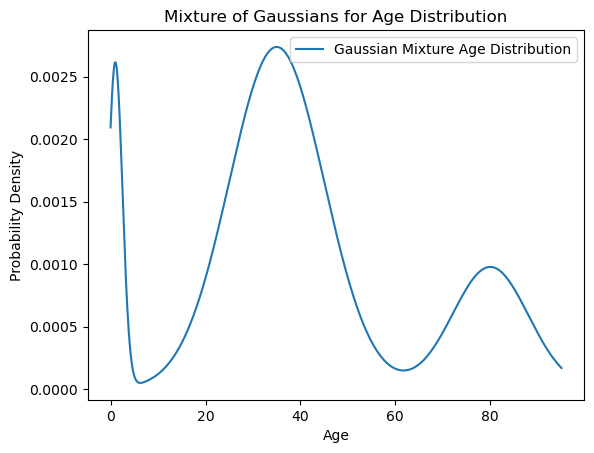

In [32]:
from scipy.stats import norm

# Age range
age_range = np.linspace(0, 95, 1000)

# Mixture of Gaussians
young_gaussian = 0.1 * norm.pdf(age_range, loc=1, scale=1.5)  # Fewer young people
middle_gaussian = 0.7 * norm.pdf(age_range, loc=35, scale=10)  # Peak at middle age
old_gaussian = 0.2 * norm.pdf(age_range, loc=80, scale=8)  # Fewer old people

# Combine the components
distribution = young_gaussian + middle_gaussian + old_gaussian

# Normalize the distribution
distribution /= np.sum(distribution)

# Plot the distribution
plt.plot(age_range, distribution, label="Gaussian Mixture Age Distribution")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title("Mixture of Gaussians for Age Distribution")
plt.legend()
plt.show()

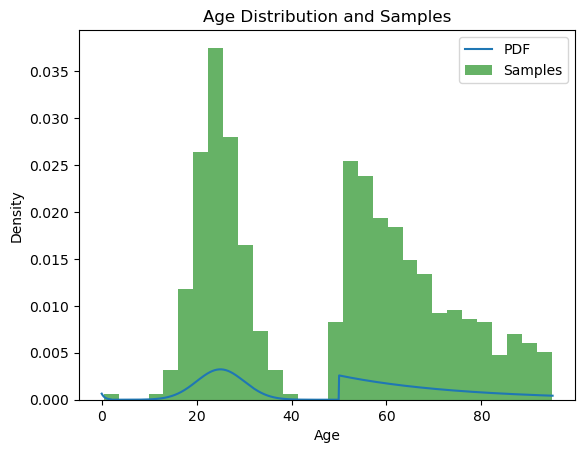

In [33]:
# Define the age range
age_range = np.linspace(0, 95, 1000)

# Define the piecewise probability distribution (same as before)
def age_distribution(age):
    if age <= 2:
        return 0.2 * np.exp(-1.5 * age)  # Fewer young
    elif 2 < age <= 50:
        return np.exp(-0.02 * (age - 25)**2)  # Peak around 25-50
    else:
        return 0.8 * np.exp(-0.04 * (age - 50))  # Gradual decline

# Apply the distribution function to the age range
distribution = np.array([age_distribution(age) for age in age_range])

# Normalize the PDF to make it a valid probability distribution
distribution /= np.sum(distribution)

# Compute the CDF by cumulative sum of the PDF (trapezoidal integration)
cdf = np.cumsum(distribution)
cdf /= cdf[-1]  # Normalize the CDF to ensure it goes from 0 to 1

# Inverse transform sampling: draw uniform samples and map them to the age range
num_samples = 1000
uniform_samples = np.random.rand(num_samples)  # Uniform [0, 1] samples
age_samples = np.interp(uniform_samples, cdf, age_range)  # Interpolate to get age values

# Plot the distribution and the histogram of the samples
plt.plot(age_range, distribution, label="PDF")
plt.hist(age_samples, bins=30, density=True, alpha=0.6, color='g', label="Samples")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution and Samples")
plt.legend()
plt.show()